In [1]:
# !pip install numpy pandas matplotlib seaborn scikit-learn statsmodels shap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_gas_compo_data = pd.read_excel('Dataset/NonCatalytic.xlsx')
data = no_gas_compo_data.copy()

In [3]:
#drop row where NO. == NaN
data = data.dropna(subset=['NO.'])

In [4]:
#removing empty rows
data = data.dropna(how='all')
data

,NO.,biomass,waste plastics,MB,VB,FCB,AshB,CB,HB,NB,...,HR,HTT,GAS,OIL,CHAR,CO,CO2,H2,CH4,DOI
1,1.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,18.4,67.1,14.5,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
2,2.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,15.4,82.6,2,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
3,3.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,25.9,59.8,14.3,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
4,4.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,21.6,75.3,3.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
5,5.0,Palm fond,Low-density polyethylene,7.51,73.32,14.11,5.06,39.1,6.74,2.3,...,10,540,19.9,65,15.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,0.5,99.5,0,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
249,249.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,12.84,71.74,15.42,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
250,250.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,15.53,67.52,16.95,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
251,251.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,19.66,59.28,21.06,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550


In [5]:
data.columns

Index(['NO.', 'biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB',
       'HB', 'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP',
       'AshP', 'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO',
       'CO2', 'H2', 'CH4', 'DOI'],
      dtype='object')

In [6]:
data.drop(columns=['NO.', 'DOI'], axis=1, inplace=True)

In [7]:
data.columns

Index(['biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB', 'HB',
       'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP', 'AshP',
       'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2',
       'CH4'],
      dtype='object')

In [8]:
#predictive_columns are the columns that we will use to predict the target variable i.e. GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2','CH4'
predictive_columns = ['GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2', 'CH4']
X = data.drop(columns=predictive_columns)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    object 
 1   waste plastics  252 non-null    object 
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [10]:
#Numeric encoding of biomass and waste plastics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['biomass'] = le.fit_transform(X['biomass'])
X['waste plastics'] = le.fit_transform(X['waste plastics'])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [12]:
#converting all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    float64


In [13]:
#normalisation of data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    float64
 1   waste plastics  252 non-null    float64
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    flo

In [14]:
y = data['GAS']

In [15]:
y = y.apply(pd.to_numeric, errors='coerce')
y.info()

<class 'pandas.core.series.Series'>
Index: 252 entries, 1 to 252
Series name: GAS
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


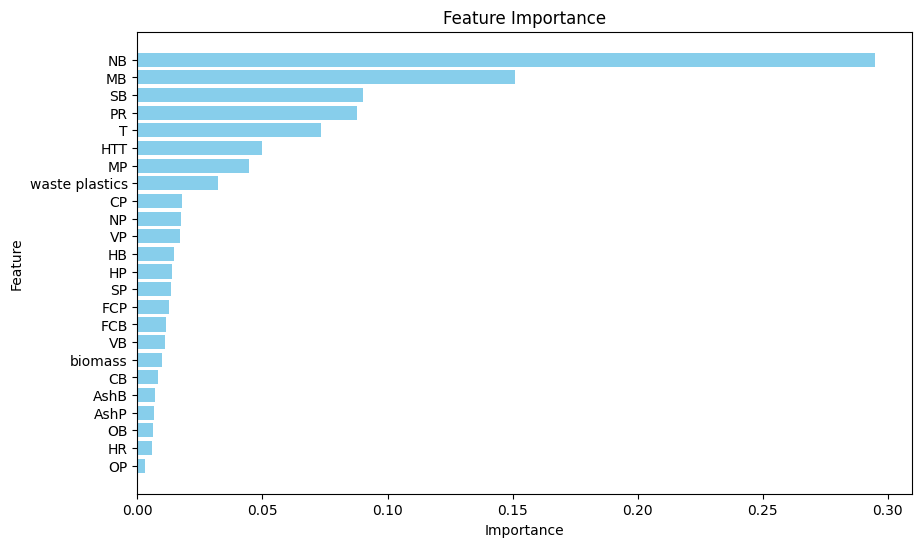

In [16]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_scaled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

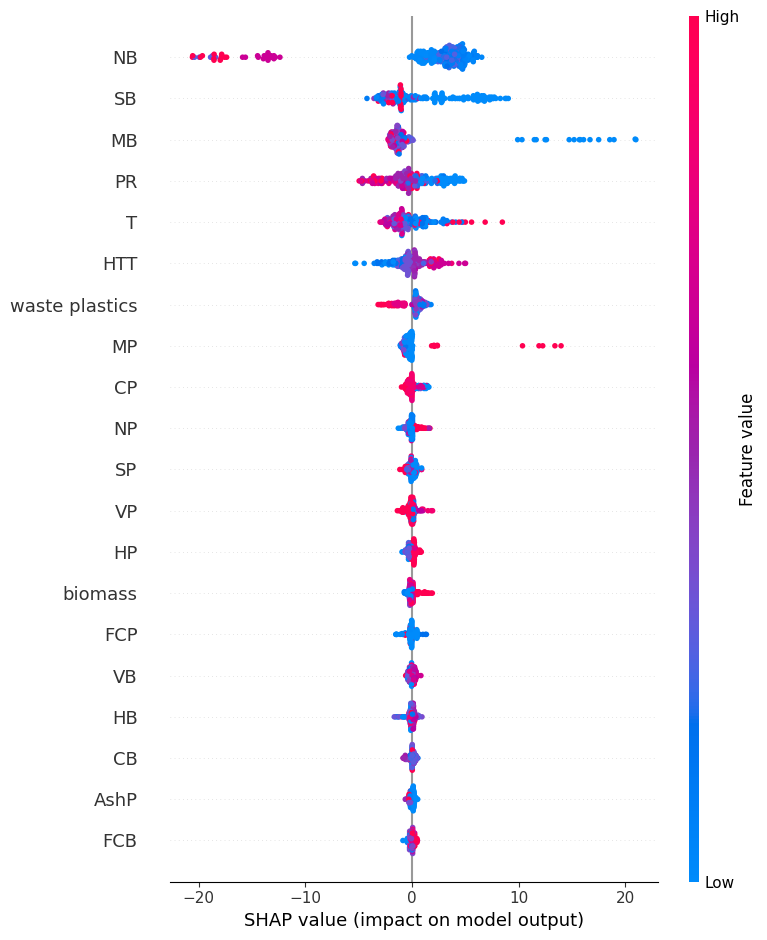

In [17]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)


In [18]:
#Starting with Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 59.99889615258239
R^2 Score: 0.7322640750593745


In [19]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ada Boost": AdaBoostRegressor(random_state=42),
    "Grad Boost": GradientBoostingRegressor(random_state=42),
    "XG Boost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

SVM - Mean Squared Error: 183.40255348190144, R^2 Score: 0.18159407186300436
KNN - Mean Squared Error: 74.07817247058823, R^2 Score: 0.6694374514176713
Decision Tree - Mean Squared Error: 59.869164705882355, R^2 Score: 0.7328429818577228
Random Forest - Mean Squared Error: 45.63488245287521, R^2 Score: 0.7963612958477506
Ada Boost - Mean Squared Error: 84.54524786814434, R^2 Score: 0.6227297235644591
Grad Boost - Mean Squared Error: 43.39489160193395, R^2 Score: 0.8063569134472834
XG Boost - Mean Squared Error: 31.306213908374758, R^2 Score: 0.8603007942707455


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

2025-12-20 19:33:05.202543: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-20 19:33:05.202574: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-20 19:33:05.202581: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-20 19:33:05.202613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-20 19:33:05.202627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000
 1/13 [=>............................] - ETA: 3s - loss: 848.7768 - mse: 848.7768

2025-12-20 19:33:05.554463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-12-20 19:33:05.575386: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 1s 22ms/step - loss: 932.2070 - mse: 932.2070 - val_loss: 906.4601 - val_mse: 906.4601
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 887.3946 - mse: 887.3946 - val_loss: 870.4601 - val_mse: 870.4601
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 842.0931 - mse: 842.0931 - val_loss: 833.8666 - val_mse: 833.8666
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 792.0886 - mse: 792.0886 - val_loss: 793.1006 - val_mse: 793.1006
Epoch 5/1000
13/13 [==============================] - 0s 11ms/step - loss: 741.3375 - mse: 741.3375 - val_loss: 745.7641 - val_mse: 745.7641
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 680.2242 - mse: 680.2242 - val_loss: 697.4604 - val_mse: 697.4604
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 617.2628 - mse: 617.2628 - val_loss: 643.0698 - val_mse: 643.0698
Epoch 8/1000
13/13 [===========

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000
13/13 [==============================] - 0s 19ms/step - loss: 956.7126 - mse: 956.7126 - val_loss: 924.0432 - val_mse: 924.0432
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 911.3499 - mse: 911.3499 - val_loss: 892.3311 - val_mse: 892.3311
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 869.3829 - mse: 869.3829 - val_loss: 859.2914 - val_mse: 859.2914
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 825.4824 - mse: 825.4824 - val_loss: 822.0469 - val_mse: 822.0469
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 778.0878 - mse: 778.0878 - val_loss: 781.6262 - val_mse: 781.6262
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 723.9162 - mse: 723.9162 - val_loss: 736.6707 - val_mse: 736.6707
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 666.3952 - mse: 666.3952 - val_loss: 686.6676 - val_mse: 686.6676
Epoch 8/1000
13/13 

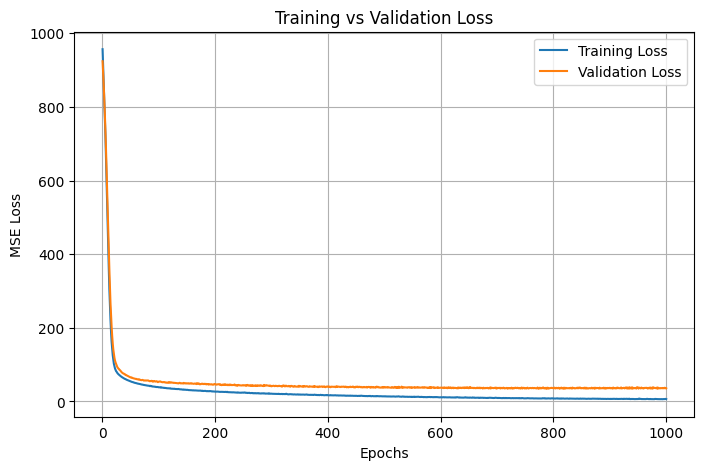

In [25]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


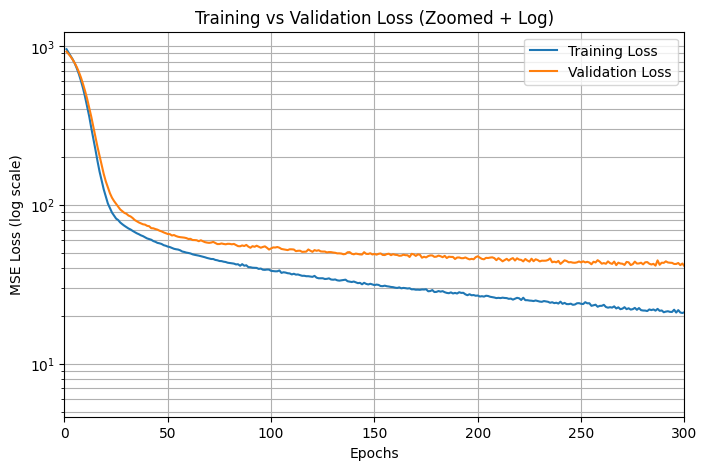

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.xlim(0, 300)
plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Training vs Validation Loss (Zoomed + Log)')
plt.legend()
plt.grid(True, which="both")
plt.show()


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000
13/13 [==============================] - 1s 21ms/step - loss: 944.0881 - mse: 944.0881 - val_loss: 903.9916 - val_mse: 903.9916
Epoch 2/1000
13/13 [==============================] - 0s 7ms/step - loss: 881.6494 - mse: 881.6494 - val_loss: 856.6493 - val_mse: 856.6493
Epoch 3/1000
13/13 [==============================] - 0s 8ms/step - loss: 816.7209 - mse: 816.7209 - val_loss: 802.5938 - val_mse: 802.5938
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 746.8937 - mse: 746.8937 - val_loss: 743.8144 - val_mse: 743.8144
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 670.4958 - mse: 670.4958 - val_loss: 673.6048 - val_mse: 673.6048
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 584.8918 - mse: 584.8918 - val_loss: 600.1541 - val_mse: 600.1541
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 496.5950 - mse: 496.5950 - val_loss: 523.2288 - val_mse: 523.2288
Epoch 8/1000
13/13 